In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
from tensorflow.keras.preprocessing import image as image_utils
import numpy as np
import cv2
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
ImageFile.LOAD_TRUNCATED_IMAGES = True
import os 
import tensorflow_datasets as tfds


In [2]:
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None
)

# Data visualisation

In [3]:
def list_files(path):
    for root, dirs, files in os.walk(path):
        level = root.replace(path, '').count(os.sep)
        indent = ' ' * 4 * (level)
        subindent = ' ' * 4 * (level + 1)
        x=0
        for f in files:
            x=x+1
        if (x!=0):
            print('{}{}/'.format(indent, os.path.basename(root)),x)

In [4]:
list_files("FaceShape Dataset/for visiualise")

    Heart/ 1000
    Oblong/ 1000
    Oval/ 1000
    Round/ 1000
    Square/ 1000


In [5]:
image_data = tf.keras.preprocessing.image_dataset_from_directory(
    "FaceShape Dataset/for visiualise",
    seed=123)


Found 5000 files belonging to 5 classes.


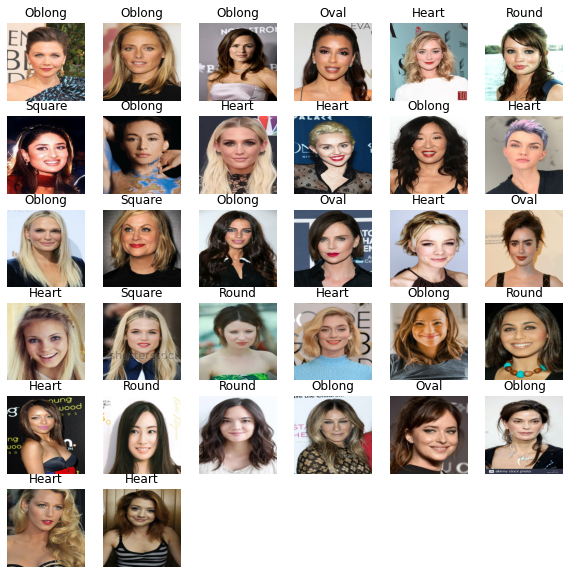

In [6]:
plt.figure(figsize=(10, 10))
class_names = image_data.class_names
for images, labels in image_data.take(1):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
image_data.class_names

['Heart', 'Oblong', 'Oval', 'Round', 'Square']

# Data Augmentation + Data Preparation

In [14]:
datagen = ImageDataGenerator(
    brightness_range=[0.2, 1.5],
    #shear_range=50, #just for viz
    rescale=1./255,# for fit 
    samplewise_center=True, #mask
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    zoom_range = 0.1, 
    vertical_flip=False)

In [15]:
# load and iterate training dataset
train_it = datagen.flow_from_directory('FaceShape Dataset/training_set', 
                                       target_size=(224,224), 
                                       color_mode='rgb', 
                                       class_mode="categorical")
# load and iterate validation dataset
valid_it = datagen.flow_from_directory('FaceShape Dataset/testing_set', 
                                      target_size=(224,224), 
                                      color_mode='rgb', 
                                      class_mode="categorical")

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [10]:
image_path="C:/Users/msi/9raya/pfe/face shape model/oval (514).jpg"

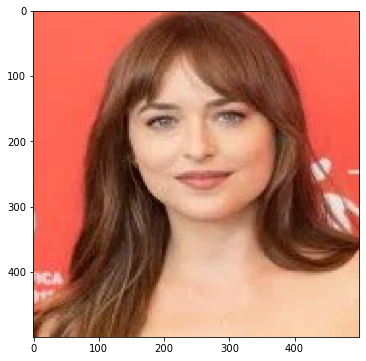

In [11]:
#Loads image in from the set image path
img = keras.preprocessing.image.load_img(image_path, target_size= (500,500))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

img_tensor /= 255.

plt.figure(figsize=(6,6))
plt.imshow(img_tensor[0])
plt.show()

## Horizontal & Vertical Flip

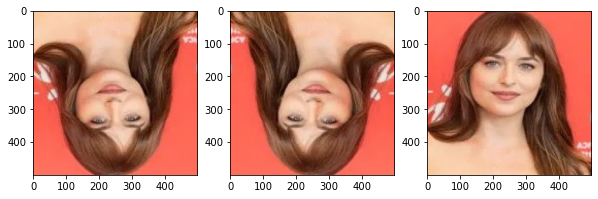

In [12]:

img = keras.preprocessing.image.load_img(image_path, target_size= (500,500))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,8))

for i in range(1,4):
  plt.subplot(1, 3, i)
  batch = pic.next()
  image_ = batch[0].astype('uint8')
  plt.imshow(image_)
plt.show()

## Width Shift Range

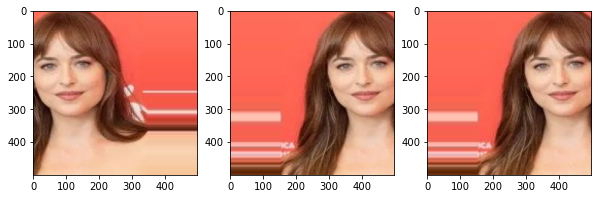

In [13]:
#Loads in image path
img = keras.preprocessing.image.load_img(image_path, target_size= (500,500))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(width_shift_range=[-150, 150])


pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,8))

for i in range(1,4):
  plt.subplot(1, 3, i)
  batch = pic.next()
  image_ = batch[0].astype('uint8')
  plt.imshow(image_)
plt.show()

## Height Shift Range

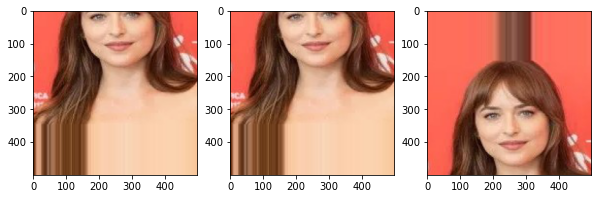

In [80]:
#Loads in image path
img = keras.preprocessing.image.load_img(image_path, target_size= (500,500))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(height_shift_range=[-150, 150])
#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,8))
#Plots our figures
for i in range(1,4):
  plt.subplot(1, 3, i)
  batch = pic.next()
  image_ = batch[0].astype('uint8')
  plt.imshow(image_)
plt.show()

## Rotation Range

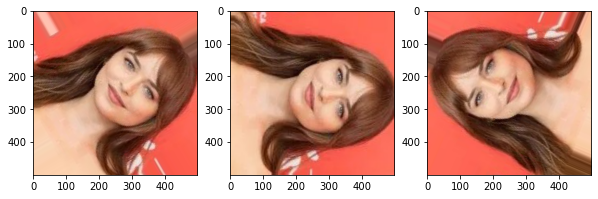

In [82]:
#Loads in image path
img = keras.preprocessing.image.load_img(image_path, target_size= (500,500))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(rotation_range=120)
#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,8))
#Plots our figures
for i in range(1,4):
  plt.subplot(1, 3, i)
  batch = pic.next()
  image_ = batch[0].astype('uint8')
  plt.imshow(image_)
plt.show()

## Brightness Range

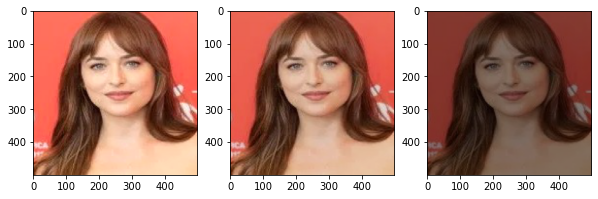

In [51]:

img = keras.preprocessing.image.load_img(image_path, target_size= (500,500))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

datagen = ImageDataGenerator(brightness_range=[0.1, 1.5])
#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,8))
#Plots our figures
for i in range(1,4):
  plt.subplot(1, 3, i)
  batch = pic.next()
  image_ = batch[0].astype('uint8')
  plt.imshow(image_)
plt.show()

## Zoom

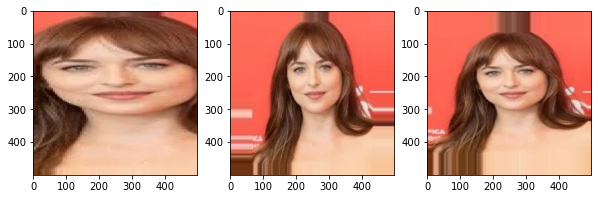

In [52]:
#Loads in image path
img = keras.preprocessing.image.load_img(image_path, target_size= (500,500))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(zoom_range=[0.3, 1.5])

#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,8))
#Plots our figures
for i in range(1,4):
  plt.subplot(1, 3, i)
  batch = pic.next()
  image_ = batch[0].astype('uint8')
  plt.imshow(image_)
plt.show()

## Shear Range


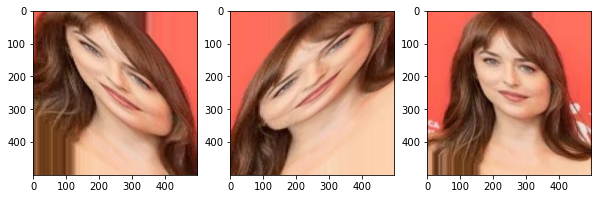

In [53]:
#Loads in image path
img = keras.preprocessing.image.load_img(image_path, target_size= (500,500))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(shear_range=50)

#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,8))
#Plots our figures
for i in range(1,4):
  plt.subplot(1, 3, i)
  batch = pic.next()
  image_ = batch[0].astype('uint8')
  plt.imshow(image_)
plt.show()

## bring it all together + Mask generation

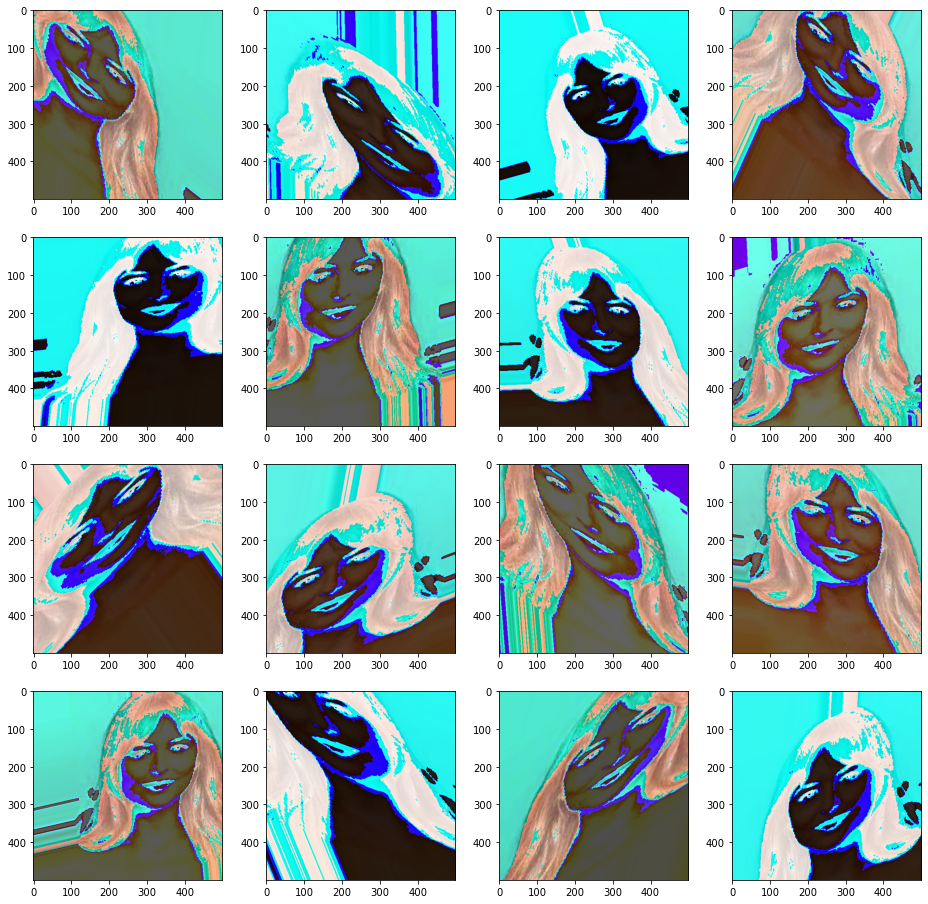

In [73]:
img = keras.preprocessing.image.load_img(image_path, target_size= (500,500))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
#Uses ImageDataGenerator to flip the images

#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(16, 16))
#Plots our figures
for i in range(1,17):
   plt.subplot(4, 4, i)
   batch = pic.next()
   image_ = batch[0].astype('uint8')
   plt.imshow(image_)
plt.show()

# Modeling

# Setting env for gpu

In [16]:
import tensorflow as tf
from tensorflow.python.keras import backend as K
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 0 } )
sess = tf.compat.v1.Session(config=config) 
K.set_session(sess)

# Inception v3 model

In [17]:
base_model = keras.applications.InceptionV3(
    weights='imagenet', 
    input_shape=(224, 224, 3),
    include_top=False)

In [18]:

inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)


x = keras.layers.GlobalAveragePooling2D()(x)


outputs = keras.layers.Dense(5, activation = 'softmax')(x)


model = keras.Model(inputs, outputs) 

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 10245     
Total params: 21,813,029
Trainable params: 21,778,597
Non-trainable params: 34,432
_________________________________________________________________


In [20]:
# Unfreeze the base model
base_model.trainable = True


model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
eff_history = model.fit(train_it, validation_data = valid_it, steps_per_epoch = train_it.samples/train_it.batch_size, epochs = 10)

#new 10+10+10+10 epoch

Epoch 1/10
125/125 [==============================] - 120s 960ms/step - loss: 0.1676 - accuracy: 0.9438 - val_loss: 1.1885 - val_accuracy: 0.6950
Epoch 2/10
125/125 [==============================] - 122s 974ms/step - loss: 0.1728 - accuracy: 0.9348 - val_loss: 1.2163 - val_accuracy: 0.6940
Epoch 3/10
125/125 [==============================] - 132s 1s/step - loss: 0.1586 - accuracy: 0.9448 - val_loss: 1.1544 - val_accuracy: 0.6650
Epoch 4/10
125/125 [==============================] - 133s 1s/step - loss: 0.1525 - accuracy: 0.9463 - val_loss: 1.2671 - val_accuracy: 0.6610
Epoch 5/10
125/125 [==============================] - 138s 1s/step - loss: 0.1455 - accuracy: 0.9473 - val_loss: 1.1802 - val_accuracy: 0.7110
Epoch 6/10
125/125 [==============================] - 139s 1s/step - loss: 0.1487 - accuracy: 0.9488 - val_loss: 1.2118 - val_accuracy: 0.6980
Epoch 7/10
125/125 [==============================] - 137s 1s/step - loss: 0.1407 - accuracy: 0.9492 - val_loss: 1.2188 - val_accuracy: 

# before fine tuning

In [46]:
score = model.evaluate(train_it,steps=train_it.samples/train_it.batch_size,verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

125/125 [==============================] - 68s 541ms/step - loss: 0.7481 - accuracy: 0.7185
Test loss: 0.7481108903884888
Test accuracy: 0.718500018119812


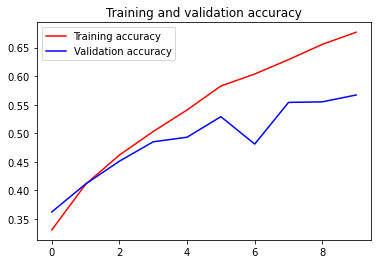

<Figure size 432x288 with 0 Axes>

In [50]:
acc = eff_history.history['accuracy']
val_acc = eff_history.history['val_accuracy']
loss = eff_history.history['loss']
val_loss = eff_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

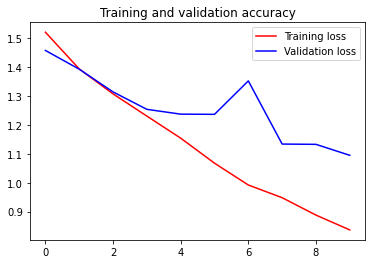

<Figure size 432x288 with 0 Axes>

In [52]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# after fine tuning

In [48]:
#test temp
score = model.evaluate(train_it,steps=train_it.samples/train_it.batch_size,verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

125/125 [==============================] - 88s 697ms/step - loss: 0.1176 - accuracy: 0.9617
Test loss: 0.11756232380867004
Test accuracy: 0.9617499709129333


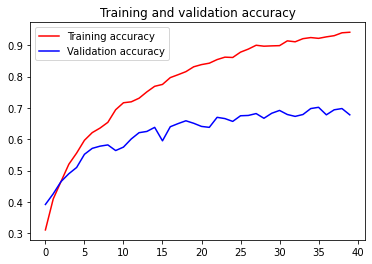

<Figure size 432x288 with 0 Axes>

In [23]:
acc = eff_history.history['accuracy']
val_acc = eff_history.history['val_accuracy']
loss = eff_history.history['loss']
val_loss = eff_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

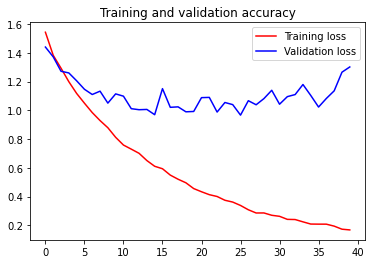

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [30]:
eff_history.model.save('test')# moverfiti # 40 epoch but good for graph/ viz

INFO:tensorflow:Assets written to: test\assets


# VGG16 model

In [40]:
base_model = keras.applications.VGG16(
    weights='imagenet', 
    input_shape=(224, 224, 3),
    include_top=False)
base_model.trainable = False 

In [41]:
# Create inputs with correct shape
inputs = keras.Input(shape=(224, 224, 3))#<-Changed

x = base_model(inputs, training=False)

# Add pooling layer or flatten layer
x = keras.layers.GlobalAveragePooling2D()(x)#<-Changed

# Add final dense layer
outputs = keras.layers.Dense(5, activation = 'softmax')(x)

# Combine inputs and outputs to create model
model = keras.Model(inputs, outputs) #<-Change

In [42]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2565      
Total params: 14,717,253
Trainable params: 2,565
Non-trainable params: 14,714,688
_________________________________________________________________


In [43]:
# Unfreeze the base model
base_model.trainable = True


model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
eff_history = model.fit(train_it, validation_data = valid_it, steps_per_epoch = train_it.samples/train_it.batch_size, epochs = 10)
# 10 epoch

Epoch 1/10
125/125 [==============================] - 131s 927ms/step - loss: 1.5774 - accuracy: 0.2652 - val_loss: 1.4980 - val_accuracy: 0.3220
Epoch 2/10
125/125 [==============================] - 126s 1s/step - loss: 1.4460 - accuracy: 0.3825 - val_loss: 1.3824 - val_accuracy: 0.4080
Epoch 3/10
125/125 [==============================] - 117s 936ms/step - loss: 1.3383 - accuracy: 0.4400 - val_loss: 1.3095 - val_accuracy: 0.4510
Epoch 4/10
125/125 [==============================] - 114s 910ms/step - loss: 1.2519 - accuracy: 0.4933 - val_loss: 1.2830 - val_accuracy: 0.4660
Epoch 5/10
125/125 [==============================] - 107s 858ms/step - loss: 1.2002 - accuracy: 0.5253 - val_loss: 1.2363 - val_accuracy: 0.5070
Epoch 6/10
125/125 [==============================] - 107s 856ms/step - loss: 1.1299 - accuracy: 0.5447 - val_loss: 1.5390 - val_accuracy: 0.3840
Epoch 7/10
125/125 [==============================] - 112s 893ms/step - loss: 1.0899 - accuracy: 0.5650 - val_loss: 1.1265 - va

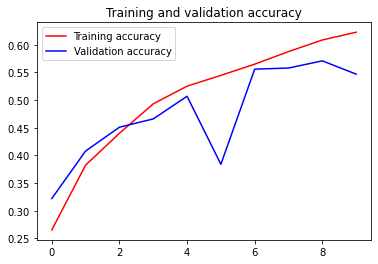

<Figure size 432x288 with 0 Axes>

In [45]:
acc = eff_history.history['accuracy']
val_acc = eff_history.history['val_accuracy']
loss = eff_history.history['loss']
val_loss = eff_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

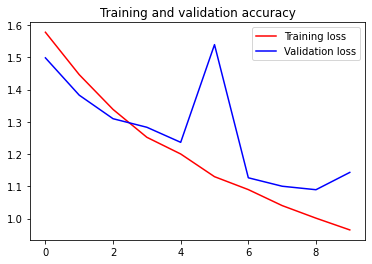

<Figure size 432x288 with 0 Axes>

In [46]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# Custom Model

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)

model = Sequential()


model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))


model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))


model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))


model.add(Flatten())


model.add(Dense(units=512, activation="relu"))


model.add(Dropout(0.3))


model.add(Dense(units=5, activation="softmax"))

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 75)      2100      
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 75)      300       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 75)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 50)      33800     
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 50)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 50)      200       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 50)        0

In [49]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = .00001),  # Very low learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
efff_history = model.fit(train_it, validation_data = valid_it, steps_per_epoch = train_it.samples/train_it.batch_size, epochs = 10)


Epoch 1/10
125/125 [==============================] - 100s 786ms/step - loss: 2.3601 - accuracy: 0.2037 - val_loss: 1.7458 - val_accuracy: 0.2160
Epoch 2/10
125/125 [==============================] - 103s 823ms/step - loss: 2.0966 - accuracy: 0.2240 - val_loss: 1.9171 - val_accuracy: 0.2020
Epoch 3/10
125/125 [==============================] - 109s 868ms/step - loss: 1.9602 - accuracy: 0.2515 - val_loss: 1.9992 - val_accuracy: 0.2190
Epoch 4/10
125/125 [==============================] - 106s 847ms/step - loss: 1.8582 - accuracy: 0.2542 - val_loss: 1.7524 - val_accuracy: 0.2500
Epoch 5/10
125/125 [==============================] - 106s 848ms/step - loss: 1.8053 - accuracy: 0.2438 - val_loss: 1.7530 - val_accuracy: 0.2360
Epoch 6/10
125/125 [==============================] - 101s 806ms/step - loss: 1.7748 - accuracy: 0.2590 - val_loss: 1.6412 - val_accuracy: 0.2770
Epoch 7/10
125/125 [==============================] - 100s 802ms/step - loss: 1.7401 - accuracy: 0.2598 - val_loss: 1.6437 -

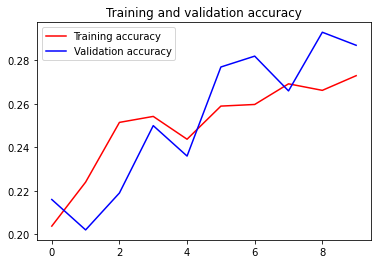

<Figure size 432x288 with 0 Axes>

In [51]:
acc = efff_history.history['accuracy']
val_acc = efff_history.history['val_accuracy']
loss = efff_history.history['loss']
val_loss = efff_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

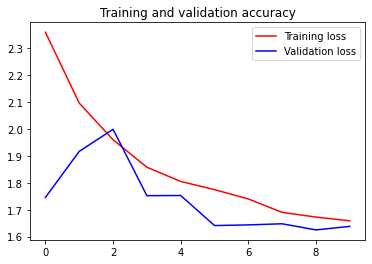

<Figure size 432x288 with 0 Axes>

In [52]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

# Exporting the best model inception

In [ ]:
eff_history.model.save('final face shape model')#model 40 epoch

In [38]:
alphabet = ('heart','oblong','oval','round','square')
dictionary = {}
for i in range(5):
    dictionary[i] = alphabet[i]
dictionary

{0: 'heart', 1: 'oblong', 2: 'oval', 3: 'round', 4: 'square'}

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

In [36]:

def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path,target_size=(224,224))
    return image

In [32]:
def predict_shape_image(file_path):
    show_image(file_path)
    image = load_and_scale_image(file_path)
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3) 
    #image = image/255
    proba=eff_history.model.predict_on_batch(image)
    prediction = eff_history.model.predict(image)
    # convert prediction to letter
    predicted_shape = dictionary[np.argmax(prediction)]
    return predicted_shape,proba[0][np.argmax(prediction)]*100

('round', 100.0)


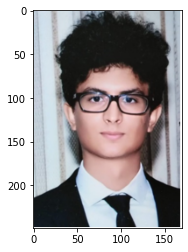

In [42]:
print(predict_shape_image("me.png"))